<a href="https://colab.research.google.com/github/CD-GRUPO3/TA047R-1C2025-GRUPO03/blob/main/TA047R_TP1_GRUPO03_ENTREGA_EJ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Grupo 3 - Ejercicio 1: *Análisis exploratorio de datos*
**Objetivo:** realizar un análisis completo del conjunto de datos, aplicar técnicas de exploración y de preprocesamiento para poder responder algunas preguntas que se planteen sobre los datos.

**Conjunto de datos:** [uso de Taxis Yellow Cab en USA](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page), particularmente los meses **Julio**, **Agosto** y **Septiembre**.

**Integrantes:**
- ARIAS, Rafaela Pilar. 112272. rparias@fi.uba.ar.
- BARCALA ROCA, Ramiro. 112478. rbarcala@fi.uba.ar.
- LEMA, Mora. 111831. molema@fi.uba.ar.
- IENCO, Lara Eliana. 111921. lienco@fi.uba.ar.

___

####Bibliografía:
Julca, J. E. (2025, febrero 22). Tipos de variables estadísticas: Cuantitativas y Cualitativas. Escuela de Investigación. Recuperado de: [Link](https://escueladeinvestigacion.com/2025/02/22/tipos-de-variables-estadisticas-cuantitativas-y-cualitativas/).

Sin Autor, (2022, junio 7). ¿Qué es una variable discreta? (ejemplos). Probabilidad y Estadística. [Link](https://www.probabilidadyestadistica.net/variable-discreta/).


#####Inicialiación del entorno

In [2]:
#Importar las bibliotecas
import matplotlib.pyplot as plt   #Generación de gráficos
import matplotlib.ticker as ticker

import numpy as np                #Operaciones matemáticas y estadísticas
import seaborn as sns             #Generación de gráficos
import pandas as pd               #Manipulación y análisis de datos
import pyarrow.parquet as pq      #Trabajar con archivos .parquet

!pip install plotly_express
import plotly_express as px

#Configurar Pandas para que no use notación científica (CUALQUIER COSA ELIMINAR!!)
pd.set_option('display.float_format', '{:.6f}'.format)


In [3]:
#Cargar los datos al Notebook

#Datasets
!gdown 1iju9XQghLYI4-XcDt1TVDE1O9ZwRyFVg
!gdown 1MukhnrymZ35FVsahXUs5I0cAeGJMoXgG
!gdown 1hEhbxXEC7Dc4iG0fKk2k1n8KM6emWxSg

#CSV de estaciones
!gdown 121-MQOXDQI1uTDXgiDETE4VSId1qnYSB

Downloading...
From: https://drive.google.com/uc?id=1iju9XQghLYI4-XcDt1TVDE1O9ZwRyFVg
To: /content/yellow_tripdata_2024-07.parquet
100% 52.3M/52.3M [00:01<00:00, 42.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MukhnrymZ35FVsahXUs5I0cAeGJMoXgG
To: /content/yellow_tripdata_2024-08.parquet
100% 51.1M/51.1M [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hEhbxXEC7Dc4iG0fKk2k1n8KM6emWxSg
To: /content/yellow_tripdata_2024-09.parquet
100% 61.2M/61.2M [00:00<00:00, 87.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=121-MQOXDQI1uTDXgiDETE4VSId1qnYSB
To: /content/taxi_zone_lookup.csv
100% 12.3k/12.3k [00:00<00:00, 31.6MB/s]


In [4]:
#Obtener cada DataFrame para utilizar Pandas
trips1 = pq.read_table('/content/yellow_tripdata_2024-07.parquet')
dataJulio = trips1.to_pandas()

trips2 = pq.read_table('/content/yellow_tripdata_2024-08.parquet')
dataAgosto = trips2.to_pandas()

trips3 = pq.read_table('/content/yellow_tripdata_2024-09.parquet')
dataSeptiembre = trips3.to_pandas()


stations= pd.read_csv('/content/taxi_zone_lookup.csv')

#Unir los tres Dataframes (uno por mes)
data = pd.concat([dataJulio,dataAgosto,dataSeptiembre],axis=0, ignore_index=True)

#####Análisis de las variables

**Cuantitativas**
- **tpep_pickup_datetime:** La fecha y hora en que el taxímetro fue activado. **Tipo:** <u>cuantitativa **continua**</u>.
- **tpep_dropoff_datetime:** La fecha y hora en el que el taxímetro fue desactivado. **Tipo:** <u>cuantitativa **continua**</u>.
- **passenger_count:** El número de pasajeros en el vehículo, es un valor ingresado por el conductor. **Tipo:** <u>cuantitativa discreta</u>.
- **trip_distance:** La distancia del viaje transcurrida en millas reportada por el taxímetro. **Tipo:** <u>cuantitativa  **continua**</u>.
- **fare_amount:** La tarifa calculada por el taxímetro basada en el tiempo y la distancia. **Tipo:** <u>cuantitativa **continua**</u>.
- **extra:** Extras y recargos varios. Actualmente, esto solo incluye los recargos de USD 0.50 y USD 1 por hora punta y durante la noche. **Tipo:** <u>cuantitativa **continua**</u>.
- **mta_tax:** Impuesto MTA de USD 0.50 que se activa automáticamente según la tarifa del taxímetro en uso. **Tipo:** <u>cuantitativa **continua**</u>.
- **tip_amount:** Monto de la propina. Este campo se completa automáticamente para las propinas pagadas con tarjeta de crédito. Las propinas en efectivo no están incluidas. **Tipo:** <u>cuantitativa **continua**</u>.
- **tolls_amount:** Monto total de todos los peajes pagados durante el viaje. **Tipo:** <u>cuantitativa **continua**</u>.
- **improvement_surcharge:** Recarga de mejora de USD 0.30 aplicado a los viajes al momento de iniciar el viaje (flag drop). **Tipo:** <u>cuantitativa **discreta**</u>.
- **total_amount:** El monto total cobrado a los pasajeros. No incluye las propinas en efectivo. **Tipo:** <u>cuantitativa **continua**</u>.
- **congestion_surcharge:** Monto total recaudado en el viaje por el recargo por congestión de NYS (Estado de Nueva York). **Tipo:** <u>cuantitativa **continuo**</u>.
- **Airport_fee:** USD 1.25 solo por la recogida en los aeropuertos de LaGuardia y John F. Kennedy. **Tipo:** <u>cuantitativa **discreta**</u>.

---

**Cualitativas**
- **VendorID:** Un código que indica el proveedor de TPEP (Taxi and Limousine Commission's Taxi Passenger Enhancement Program) que proporcionó el registro. *1 = Creative Mobile Technologies, LLC; 2 = VeriFone*. **Tipo:** <u>cualitativa **numérica nominal**</u>.
- **RatecodeID:** El código final de tarifa en vigor al final del viaje. *1 = Tarifa estándar; 2 = JFK; 3 = Newark; 4 = Nassau o Westchester; 5 = Tarifa negociada; 6 = Viaje en grupo*. **Tipo:** <u>cualitativa **numérica ordinal**</u>.
- **store_and_fwd_flag:** Un indicador que señala si el registro del viaje fue guardado en la memoria del vehículo antes de ser enviado al proveedor, también conocido como 'almacenar y reenviar', porque el vehículo no tenía conexión al servidor. *Y = viaje almacenado y reenviado; N = no es un viaje almacenado y reenviado*. **Tipo:** <u>cualitativa **texto nominal**</u>.
- **PULocationID:** Zona de taxi de la TLC (Comisión de Taxis y Limusinas) en la que se activó el taxímetro. **Tipo:** <u>cualitativa **numérica nominal**</u>.
- **DOLocationID:** Zona de taxi de la TLC en la que se desactivó el taxímetro. **Tipo:** <u>cualitativa **numérica nominal**</u>.
- **payment_type:** Un código numérico que indica cómo el pasajero pagó el viaje. *1 = Tarjeta de crédito; 2 = Efectivo; 3 = Sin cargo; 4 = Disputa; 5 = Desconocido; 6 = Viaje*. **Tipo:** <u>cualitativa **numérica nominal**</u>.






In [6]:
lista_cuantitativas = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

#Diccionario para almacenar las medidas estadísticas de cada columna cuantitativa
dic_estadisticas_cuantitativo = {}  #FORMATO: {'nombre columna': Serie, 'nombre columna 2': Serie, ...}

#Obtener las medidas estadísticas de cada columna cuantitativa y guardarlas en el diccionario
for columna in lista_cuantitativas:
  moda = data[columna].mode()[0]
  medidas_estadisticas = data[columna].describe()  #Excluye los valores NaN, es una Serie
  medidas_estadisticas['moda'] = moda
  dic_estadisticas_cuantitativo[columna] = medidas_estadisticas
  print(medidas_estadisticas)

  print('\n')

  #PREGUNTAR: por las que tienen NaN





count                       7391286
mean     2024-08-18 09:55:53.658532
min             2008-12-31 23:03:46
25%             2024-07-25 12:59:53
50%             2024-08-18 16:30:03
75%             2024-09-11 22:56:43
max             2024-10-01 20:58:22
moda            2024-07-16 18:36:00
Name: tpep_pickup_datetime, dtype: object


count                       7391286
mean     2024-08-18 10:09:28.537009
min             2009-01-01 00:13:25
25%             2024-07-25 13:16:03
50%      2024-08-18 16:43:08.500000
75%      2024-09-11 23:09:10.750000
max             2024-10-01 22:42:17
moda            2024-09-18 18:39:00
Name: tpep_dropoff_datetime, dtype: object


count   6639367.000000
mean          1.327617
std           0.808986
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
moda          1.000000
Name: passenger_count, dtype: float64


count   7391286.000000
mean          3.011325
std         347.904393
min           0.000

In [7]:
data['mta_tax'].unique()

array([ 0.5 , -0.5 ,  0.  ,  4.  ,  1.  ,  3.  , 10.5 ,  0.05,  4.1 ])

In [8]:
lista_cualitativas = ['VendorID','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type']

#Diccionario para almacenar los valores únicos de cada columna cualitativa
dic_valores_unicos_cualitativo = {}  #FORMATO: {'nombre columna': Serie, 'nombre columna 2': Serie, ...}

#Obtener los valores únicos de cada columna cualitativa y guardarlas en el diccionario
for columna in lista_cualitativas:
  valores_unicos_cualitativos = data[columna].unique()
  print("La columna " + columna + " tiene los valores unicos " , data[columna].unique())
  dic_valores_unicos_cualitativo[columna] = valores_unicos_cualitativos

  print('\n')



La columna VendorID tiene los valores unicos  [1 2 6]


La columna RatecodeID tiene los valores unicos  [ 1.  5.  2.  3. 99.  4.  6. nan]


La columna store_and_fwd_flag tiene los valores unicos  ['N' 'Y' None]


La columna PULocationID tiene los valores unicos  [140 114 246  68 249 100 237 186 162 107  48 141 229 236  90 262  79 234
 164 158 239 142 113 263 148  50 231 161 170 144 137 163 211 230 125  88
 224 261 232  43   4 233  45 143 238  87  24  12 209 151  13 194]


La columna DOLocationID tiene los valores unicos  [ 79 170  68 107 246 232 140 151 238 230 249 231 263  48 142 234 161 113
 100 229 143 224  90 158 237 114 164 144 162 239 148 141 236  50 186  13
 233 209 163   4 211 261 137  45  43  87 125 262  88  24  12 194 105]


La columna payment_type tiene los valores unicos  [1 2 4 3 0]




In [9]:
for columna in lista_cualitativas:
  print("Frecuencias de la columna" , data[columna].value_counts(dropna=False))
  print('\n')
  print('-'*40)
  print('\n')

Frecuencias de la columna VendorID
2    5725363
1    1665918
6          5
Name: count, dtype: int64


----------------------------------------


Frecuencias de la columna RatecodeID
1.000000     6588186
NaN           751919
5.000000       29796
2.000000       12727
99.000000       5795
3.000000        2728
4.000000         125
6.000000          10
Name: count, dtype: int64


----------------------------------------


Frecuencias de la columna store_and_fwd_flag
N       6606744
None     751919
Y         32623
Name: count, dtype: int64


----------------------------------------


Frecuencias de la columna PULocationID
161    409200
237    384446
236    318346
162    306090
186    303979
230    274793
170    260885
142    251114
68     250686
234    244407
163    233885
239    216512
48     216071
249    206525
164    202194
79     195216
141    188874
107    173722
246    168731
140    162115
229    147979
90     141686
263    141676
100    138626
238    136454
43     136109
114    12934

### **Variables a graficar:**

1. total_amount -> <u>**barra**</u>
2. passenger_count -> <u>**barra**</u>
3. trip_distance ->
4. Resta entre tpep_dropoff_datetime y tpep_pickup_datetime (? // tiempo de viaje -> <u>**lineplot**</u>
5. payment_type -> <u>**torta**</u>
6. PULocationID y DOLocationID
7. RatecodeID // tipo de tarifa -> <u>**torta**</u>
8. congestion_surcharge //new york impuesto (????????? -> <u>**barra**</u>
9. tpep_pickup_datetime hora pico de subida. -> <u>**densidad**</u>
10. tip_amount -> <u>**barra**</u>

### Relaciones:

1. Desde donde se suben hasta donde se bajan + la propina que dejan. -> <u>**regresión**</u>
2. Recaudacion total de TODOS los viajes respecto del dia. <u>**barra**</u>
3. Desde donde se suben mas a la hora pico. -> <u>**treemap**</u>
---
6. DOLocationID (bajada) + cantidad de pasajeros //lo q se bajan acá <u>**treemap**</u>
7. Duracion del viaje con respecto a la hora de subida. //ver cuanto tarda etc
8. Desde donde se suben los q hacen el viaje mas largo. <u>**treemap**</u> ?? ver la cantidad de esos.
9. Lugar de salida + cantidad de personas subiendose -> <u>**heatmap**</u> da pie a el (3)
10. Cantidad de viajes (todas las filas del dataframe) + dias semana (horizontal) + medios de pago. (puesto en discord) -> <u>**barra dos var**</u>


A debatir:

4. Precio total y medio de pago -> <u>**relación**</u>
5. Cantidad pasajeros y medio de pago -> <u>**relación**</u>

# GRAFICOS

In [10]:
data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,7391286.000000,7391286,7391286,6639367.000000,7391286.000000,6639367.000000,7391286.000000,7391286.000000,7391286.000000,7391286.000000,7391286.000000,7391286.000000,7391286.000000,7391286.000000,7391286.000000,7391286.000000,6639367.000000,6639367.000000
mean,1.774613,2024-08-18 09:55:53.658532,2024-08-18 10:09:28.537009,1.327617,3.011325,1.106291,168.401893,169.023741,1.100905,13.623416,1.191542,0.483850,2.469264,0.008318,0.970757,20.658789,2.409297,0.000116
min,1.000000,2008-12-31 23:03:46,2009-01-01 00:13:25,0.000000,0.000000,1.000000,4.000000,4.000000,0.000000,-940.000000,-7.500000,-0.500000,-93.420000,-53.380000,-1.000000,-943.500000,-2.500000,-1.750000
25%,2.000000,2024-07-25 12:59:53,2024-07-25 13:16:03,1.000000,0.920000,1.000000,137.000000,137.000000,1.000000,8.600000,0.000000,0.500000,0.000000,0.000000,1.000000,15.100000,2.500000,0.000000
50%,2.000000,2024-08-18 16:30:03,2024-08-18 16:43:08.500000,1.000000,1.500000,1.000000,163.000000,163.000000,1.000000,12.100000,1.000000,0.500000,2.460000,0.000000,1.000000,19.300000,2.500000,0.000000
75%,2.000000,2024-09-11 22:56:43,2024-09-11 23:09:10.750000,1.000000,2.340000,1.000000,234.000000,234.000000,1.000000,17.000000,2.500000,0.500000,3.720000,0.000000,1.000000,25.000000,2.500000,0.000000
max,6.000000,2024-10-01 20:58:22,2024-10-01 22:42:17,9.000000,326505.450000,99.000000,263.000000,263.000000,4.000000,940.000000,10.250000,10.500000,500.000000,90.000000,1.000000,943.500000,2.500000,1.750000
std,0.417853,NaN,NaN,0.808986,347.904393,2.906351,64.633033,66.324645,0.648449,8.960787,1.427905,0.121876,2.320178,0.348122,0.238095,10.561168,0.642952,0.015502


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7391286 entries, 0 to 9689106
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [12]:
data.shape

(7391286, 19)

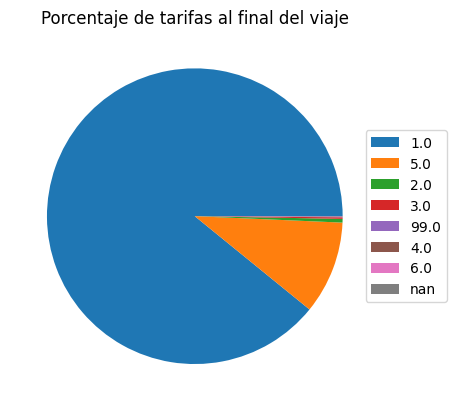

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
6814,1,2024-07-01 06:04:37,2024-07-01 06:22:51,1.000000,2.200000,99.000000,N,262,13,1,32.500000,0.000000,0.500000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
6831,1,2024-07-01 06:18:50,2024-07-01 06:30:08,1.000000,1.700000,99.000000,N,232,137,1,19.500000,0.000000,0.500000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
6832,1,2024-07-01 06:36:19,2024-07-01 07:18:18,1.000000,2.200000,99.000000,N,45,137,1,19.500000,0.000000,0.500000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
6955,1,2024-07-01 06:01:14,2024-07-01 06:09:02,1.000000,0.800000,99.000000,N,230,48,1,16.500000,0.000000,0.500000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
7665,1,2024-07-01 07:24:41,2024-07-01 07:43:43,1.000000,2.500000,99.000000,N,263,100,1,24.500000,0.000000,0.500000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689100,2,2024-09-30 23:12:38,2024-09-30 23:34:10,NaN,2.950000,NaN,None,87,158,0,16.060000,0.000000,0.500000,0.000000,0.000000,1.000000,20.060000,NaN,NaN
9689102,2,2024-09-30 23:13:53,2024-09-30 23:33:00,NaN,2.960000,NaN,None,186,232,0,17.890000,0.000000,0.500000,0.000000,0.000000,1.000000,21.890000,NaN,NaN
9689103,2,2024-09-30 23:07:32,2024-09-30 23:17:08,NaN,1.610000,NaN,None,114,13,0,9.850000,0.000000,0.500000,0.000000,0.000000,1.000000,13.850000,NaN,NaN
9689105,2,2024-09-30 23:21:00,2024-09-30 23:32:00,NaN,2.200000,NaN,None,230,90,0,12.890000,0.000000,0.500000,0.000000,0.000000,1.000000,16.890000,NaN,NaN


In [13]:
valores_unicos_ratecodeID = data['RatecodeID'].unique()
frecuencias_ratecodeID = data['RatecodeID'].value_counts(dropna=False)

#ACÁ SE VE QUE 99 ES UN VALOR ATÍPICO QUE DEBE SER FILTRADO! NO ES POSIBLE ESE VALOR.
plt.title('Porcentaje de tarifas al final del viaje')
plt.pie(frecuencias_ratecodeID)
plt.legend(valores_unicos_ratecodeID, loc='center right', bbox_to_anchor=(1.2, 0.5)) #loc sitúa la leyenda, bbox_to_anchor
                                                                                    #mueve más la leyenda porque tapaba el gráfico
plt.show()

#NaN ni figura en el gráfico, 99 tampoco --> veamos cuántas filas son afectadas.
data_filtrada = data[((data['RatecodeID'] == 99) | data['RatecodeID'].isna())]
data_filtrada


[1 2 4 3 0]


[ 24.1   19.9   14.6  ... -14.79  63.28  62.73]
(7391286, 19)


(6533975, 19)


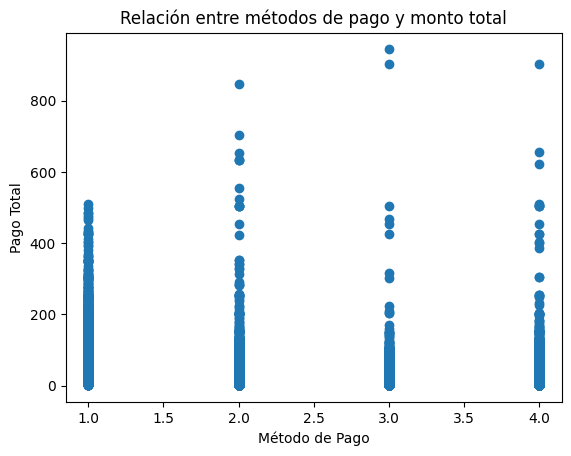

In [14]:
#data_filtrada['payment_type'] = data_filtrada['payment_type'].replace({1: 'Credito', 2: 'Efectivo',3: 'Sin cargo',4: 'Disputa',5: 'No reconocido',6: 'Pago no procesado'})
#data_filtrada = data[((data['payment_type'] <= 2) & (data['total_amount'] > 0))] #filtramos los metodos de pago a SOLO 2


print(data['payment_type'].unique())
#Tiene el 0, no debería ir porque NO EXISTE ese tipo de pago. Lo filtramos.

print('\n')

print(data['total_amount'].unique())
#No nos mostró todos los únicos pero ya vemos que hay números negativos. No debería haber negativos ni cero.

print(data.shape)
print('\n')

#Filtramos!!
data_filtrada = data[((data['payment_type'] != 0) & (data['total_amount'] > 0))]
print(data_filtrada.shape) #Si miramos la consola, disminuyó mucho.

plt.scatter(data_filtrada['payment_type'], data_filtrada['total_amount']) #tarda demasiado?????
plt.title('Relación entre métodos de pago y monto total')
plt.xlabel('Método de Pago')
plt.ylabel('Pago Total')
plt.show()


In [28]:

all_locations = pd.concat([data['PULocationID'], data['DOLocationID']]) #Creamos otro dataframe para juntar las locaciones

# Contamos la cantidad de veces que aparece cada ID
location_counts = all_locations.value_counts().reset_index()
location_counts.columns = ['LocationID', 'Count']

# Graficamos el treemap
location_counts['Borough'] = location_counts['LocationID'].map(lambda x: dic_stations.get(x, ('Desconocido', 'Desconocido'))[0])
location_counts['Zone'] = location_counts['LocationID'].map(lambda x: dic_stations.get(x, ('Desconocido', 'Desconocido'))[1])

# Agregamos la ruta jerárquica Borough -> Zone -> LocationID
fig = px.treemap(location_counts,
                 path=['Borough', 'Zone', 'LocationID'],
                 values='Count',
                 title='Tendencia de uso de estaciones de taxi en Manhattan',
                 color_discrete_map={'Borough': 'red'})  # Cambia el color de Manhattan )



fig.show()


Este grafico nos ayuda a ver que estaciones de taxis son las mas usadas, lo que nos muestra como en las zonas mas centricas y pobladas de manhattan, hay mas circulacion de taxis.

La siguiente foto ilustra lo anterior:

 <img src="https://i.imgur.com/KLEhQDx.png" alt="Alt Text" width="800" >

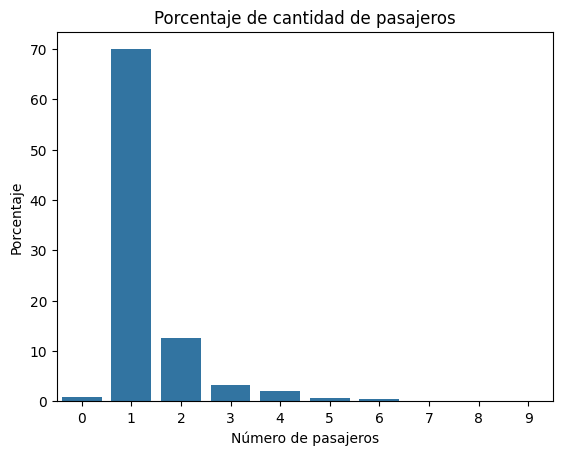

In [19]:
ax=data[['passenger_count']].dropna()
plot = sns.countplot(data, x='passenger_count', stat='percent')

plt.xticks(ticks=plot.get_xticks(), labels=[int(tick) for tick in plot.get_xticks()]) #Quito los decimales del eje x
plot.set_title('Porcentaje de cantidad de pasajeros')
plot.set_xlabel('Número de pasajeros')
plot.set_ylabel('Porcentaje')

plt.show()         # Mostrar el gráfico



En este grafico, queremos ver cuales son los valores mas usuales de pasajeros (no ponemos foco en ver la diferencia del resto de valores, ya que no es muy relevante)

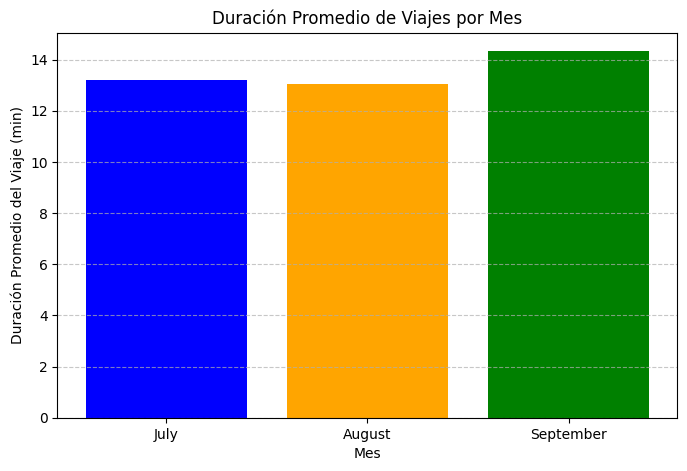

In [17]:
# Asegurar que las columnas sean de tipo datetime
data["fecha_recogida"] = pd.to_datetime(data["tpep_pickup_datetime"])
data["fecha_entrega"] = pd.to_datetime(data["tpep_dropoff_datetime"])

# Calcular la duración del viaje en minutos
data["duracion_viaje"] = (data["fecha_entrega"] - data["fecha_recogida"]).dt.total_seconds() / 60

# Extraer el mes de la fecha de recogida
data["mes"] = data["fecha_recogida"].dt.strftime("%B")  # "July", "August", "September"

# Agrupar por mes y calcular la duración promedio del viaje
duracion_promedio_mensual = data.groupby("mes")["duracion_viaje"].mean()

# Ordenar los meses en el orden correcto
orden_meses = ["July", "August", "September"]
duracion_promedio_mensual = duracion_promedio_mensual.reindex(orden_meses)

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(duracion_promedio_mensual.index, duracion_promedio_mensual, color=["blue", "orange", "green"])

# Etiquetas y título
plt.xlabel("Mes")
plt.ylabel("Duración Promedio del Viaje (min)")
plt.title("Duración Promedio de Viajes por Mes")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

ValueError: Could not interpret value `segundos_recogida` for `x`. Value is a string, but `data` was not passed.

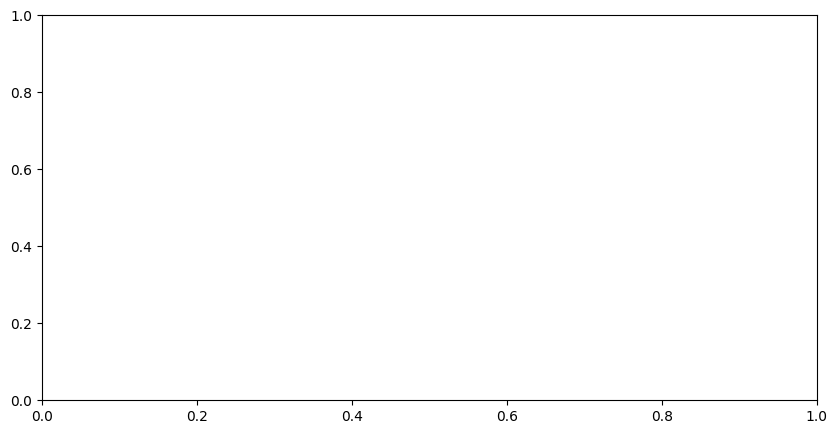

In [18]:
dataf=data.copy()
dataf["segundos_recogida"] = (
    data["fecha_recogida"].dt.hour * 3600 +
    data["fecha_recogida"].dt.minute * 60 +
    data["fecha_recogida"].dt.second
)


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(dataf=dataf, x='segundos_recogida', y='trip_distance', ax=ax)

# Función para convertir segundos a formato "HH:mm"
def segundos_a_horas(segundos):
    horas = segundos // 3600
    minutos = (segundos % 3600) // 60
    return f"{horas:02d}:{minutos:02d}"

# Fijar los ticks cada 3 horas (3 * 3600 segundos)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3 * 3600))

# Aplicar la función a los ticks del eje X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: segundos_a_horas(int(x))))

# Título
ax.set_title('Distancia de viajes durante el día')

plt.xlabel('Horas del día')
plt.ylabel('Distancia en millas')

plt.show()



#ANTERIORES
#sns.scatterplot(data, x='segundos_recogida', y='trip_distance').set(title='Distancia de viajes durante el dia')
#sns.kdeplot(data, x='segundos_recogida', y='trip_distance',bw_adjust=3).set(title='Densidad de recogida de pasajeros en horas')

Viendo este grafico, podriamos inicialmente deducir que el supuesto que habiamos dicho,parece ser correcto.

Per si vemos bien que alrededor de las 7 AM se acumulan  muchos viajes, de una distancia aproximada de 50.000 millas, nos damos cuenta de que es un trayecto absurdamente largo.
